# Basic operators

In [31]:
from sympy import *
from sympy.plotting import plot

init_printing(use_unicode=False, wrap_line=False, no_global=True)

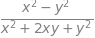

In [33]:
x,y = symbols ('x,y')
expression = (x**2-y**2)/(x**2+2*x*y+y**2)
expression

In [34]:
# simplification
simplify (expression)

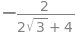

In [35]:
# Value substitution
expression.subs({x:1,
                 y:sqrt(3)
})

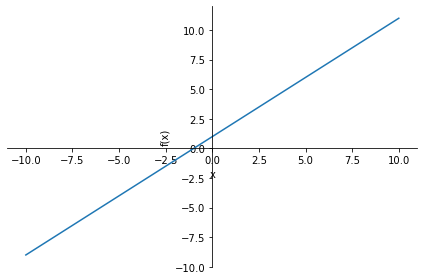

In [244]:
# Plots
f = x+1
f.subs(x,0)
plot(f)

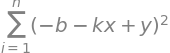

In [245]:
x,y,k,b,n,i = symbols ('x,y,k,b,n,i')
Sum((y - k*x - b)**2, (i, 1, n))

## Exercises
Draw charts and find y

**(1)** $f(x)=-3x+5$. Find y if $x=\frac{5}{3}$ и $x=2$. \
**(2)** $f(x)=3x^2+3x-6$. Find y if $x=0.5$ and $x=7$. \
**(3)** $f(x)=2x^4+x^3-6x^2+7x+1$. Find y if $x=3$ and $x=–5$. \
**(4)** $f(x)=(x^2)^x$. Find y if $x=0$ and $х=10$.

In [85]:
# the functions
f1 = -3*x+5
f2 = 3*x**2+3*x-6
f3 = 2*x**4 + x**3 - 6*x**2 + 7*x + 1
f4 = (x**2)**x

def the_funtion (f, x1, x2):
    display(f)
    print (f'y(x={x1}) = {f.subs(x, x1)}')
    print (f'y(x={x2}) = {f.subs(x, x2)}')
    return plot(f)

y(x=53) = -154
y(x=2) = -1


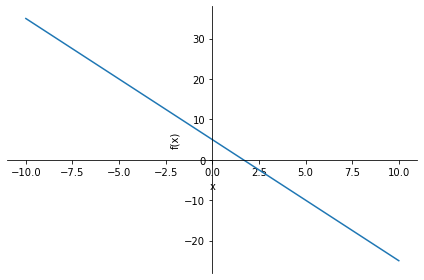

In [86]:
the_funtion(f1,53,2)

y(x=0.5) = -3.75000000000000
y(x=7) = 162


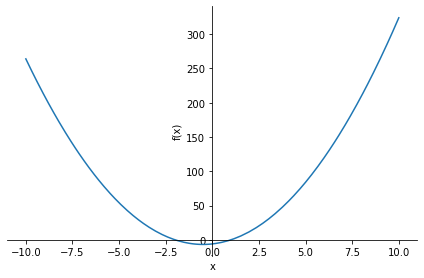

In [87]:
the_funtion(f2,0.5,7)

y(x=3) = 157
y(x=-5) = 941


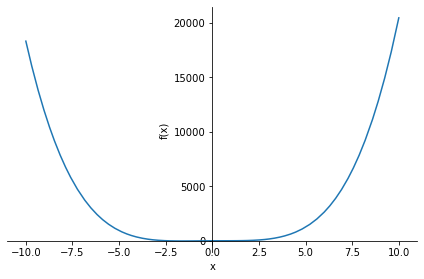

In [88]:
the_funtion(f3,3,-5)

y(x=0) = 1
y(x=10) = 100000000000000000000


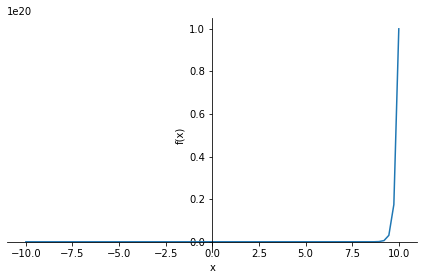

In [89]:
the_funtion(f4,0,10)

# Properties study of a function

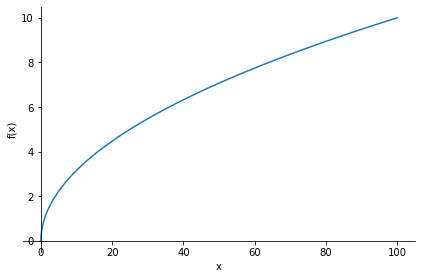

In [90]:
# field restrictions
f1 = sqrt(x)
plot (f1, (x, 0, 100))

## Function zeros and segments of signs

In [91]:
from sympy import *
from sympy.plotting import plot
from sympy.solvers.inequalities import solve_univariate_inequality
init_printing (use_unicode=False, wrap_line=False, no_global=True)

In [92]:
# This finds zeros of a function. I.e. solves the equation, if y = 0
f = x**2 + 3*x - 4
solve(f)

In [93]:
# This finds the gaps of the function’s signs. I.e. solves the inequality
solve_univariate_inequality (f>0, x)


## Analytical function

In [96]:
import sympy as sp
from IPython.display import display

def analyze_function(F):
    display(F)
    
    # Parity/Fuzziness check
    if F == F.subs(x, -x):
        print('the function is even')
    elif F == -F.subs(x, -x):
        print('the function is odd')
    else:
        print('the function is of the general form')
        
    # zeroes of the function
    zeroes = sp.solve(F)
    if len(zeroes):
        print('zeroes of the function:')
        display(zeroes)
    else:
        print('the function has no zeroes')
    
    # gaps of the function’s signs
    pos = sp.solve_univariate_inequality(F>0, x)
    neg = sp.solve_univariate_inequality(F<0, x)
    
    if pos != False:
        print('function is positive:')
        display(pos)
    if neg != False:
        print('function is positive:')
        display(neg)
    
    sp.plot(F)

the function is of the general form
zeroes of the function:


function is positive:


function is positive:


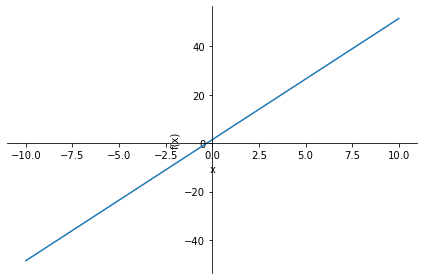

In [97]:
F = 5*x + 1.5 
analyze_function(F)

the function is of the general form
zeroes of the function:


function is positive:


function is positive:


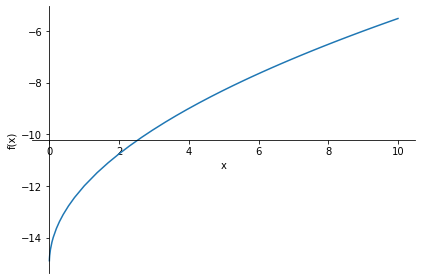

In [98]:
F1 = 3 * sqrt(x) - 15
analyze_function(F1)

the function is of the general form
zeroes of the function:


function is positive:


function is positive:


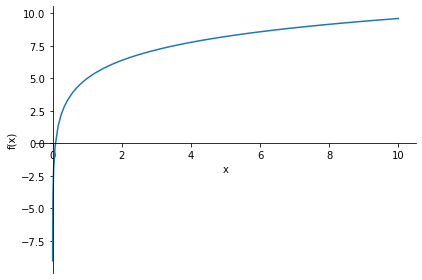

In [99]:
F2 = 2 * log(x) +5
analyze_function (F2)

the function is of the general form
zeroes of the function:


function is positive:


function is positive:


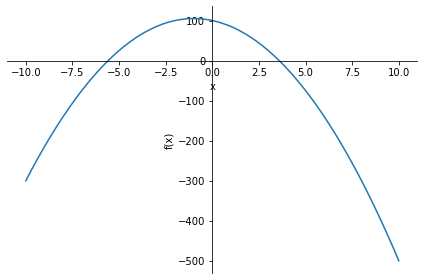

In [100]:
F3 = -5 * x**2 - 10*x + 100
analyze_function(F3)

## Interactive plots

In [101]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

In [102]:
def get_polyfunc_title(koefs):
    s_koefs = ''.join([f'+{koefs[i]}x^{len(koefs)-i-1}' if koefs[i]>0 
                       else f'{koefs[i]}x^{len(koefs)-i-1}' if koefs[i]<0 
                       else ''
                       for i in range(len(koefs))])
    expr = s_koefs.replace('x^0', '') \
                  .replace('+', ' + ') \
                  .replace('-', ' - ') \
                  .replace('x^1', 'x') \
                  .replace(' 1x', ' x')

    if expr[:3]==' + ':
        expr = expr[3:]
    if expr:
        return '$f(x) = ' + expr + '$'

In [106]:
def check(f, x, y):
    check = False not in [f(x[i])==y[i] for i in range(len(x))]
    if not check:
        print('Still not there')
    else:
        print('You have nailed it!')

In [107]:
def parabola(a, b, c):
    plt.figure(3)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    x, y = [x for x, y in points], [y for x, y in points]
    plt.scatter(x, y, c='r')


    
    if a != 0:
        f = lambda x: a * x**2 + b * x + c
        check(f, x, y)
        
        x = np.linspace(-15, 15, num=1000)
        plt.plot(x, a * x**2 + b * x + c)
    
    plt.ylim(-35, 35)
    plt.xlim(-10, 10)
        
    plt.title(get_polyfunc_title([a,b,c]))
    plt.show()

In [108]:
points = [[-2.5, 15.0], 
          [-2, 10], 
          [-1.5, 7.0], 
          [-1, 6], 
          [-0.5, 7.0], 
          [0, 10], 
          [0.5, 15.0], 
          [1, 22], 
          [1.5, 31.0]]

interactive_plot = interactive(parabola, a=(-5, 5, 1), b=(-100, 100, 1), c=(-20, 20, 1))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(IntSlider(value=0, description='a', max=5, min=-5), IntSlider(value=0, description='b', …

In [110]:
points = [[-5.0, -68.0], 
          [-3.75, -42.375], 
          [-2.5, -23.0], 
          [-1.25, -9.875], 
          [0.0, -3.0], 
          [1.25, -2.375], 
          [2.5, -8.0], 
          [3.75, -19.875], 
          [5.0, -38.0]]

interactive_plot = interactive(parabola, a=(-5, 5, 1), b=(-100, 100, 1), c=(-20, 20, 1))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(IntSlider(value=0, description='a', max=5, min=-5), IntSlider(value=0, description='b', …

In [111]:
def cubic_parabola(a, b, c, d):
    plt.figure(3)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    x, y = [x for x, y in points], [y for x, y in points]
    plt.scatter(x, y, c='r')
    
    if a!=0:
        f = lambda x: a * x**3 + b * x**2 + c * x + d
        check(f, x, y)
        
        x = np.linspace(-15, 15, num=1000)
        plt.plot(x, a * x**3 + b * x**2 + c * x + d)
        
    plt.ylim(-35, 35)
    plt.xlim(-5, 5)
    
    plt.title(get_polyfunc_title([a,b,c,d]))
    
    plt.show()

In [112]:
points = [[-0.5, -15.0],
          [-1, -31],
          [0, -7],
          [0.5, -4.0],
          [1, -3],
          [2, 5],
          [2.5, 18.0],
          [3, 41]]

interactive_plot = interactive(cubic_parabola, a=(-15, 15, 1), b=(-10, 10, 1), c=(-10, 10, 1), d=(-10, 10, 1))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(IntSlider(value=0, description='a', max=15, min=-15), IntSlider(value=0, description='b'…

# Polynomial interpolation 

In [117]:
a2,a1,a0 = symbols('a2,a1,a0')

# Assume we have three historical cases (points). 
# It means, we can meet them by a polynomial with the elder degree of 2
# The task is to find the coefficients a2, a1, a0 
f = a2*x**2 + a1*x + a0
display (f)

# Historical data (coordinates of the points): [-1,-1],[2,2], [-2,-8]
eq1 = a2 - a1 + a0 + 1
eq2 = 4*a2 + 2*a1 + a0 - 8
eq3 = 4*a2 - 2*a1 + a0 + 8

# solve the system of equations, find coefficients
nonlinsolve ([eq1, eq2, eq3], [a2, a1, a0]) 

In [124]:
# the resolving funtion
f1 = (-1)*x**2 + 4*x + 4
display (f1)

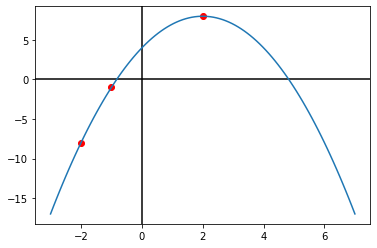

In [125]:
import numpy as np
import matplotlib.pyplot as plt

x_range = np.linspace (-3, 7, num=100)
f = lambda x: -x**2 + 4*x + 4
plt.scatter ([-1,2,-2], [-1,8,-8], c='r')
plt.axhline (0, color = 'black')
plt.axvline (0, color = 'black')
plt.plot (x_range, f(x_range))

## Exercises
- 1. (−2.5,15.0),(−2,10),(−1.5,7.0) 
- 2. (−0.5,−15.0),(−1,−31),(0,−7),(0.5,−4.0)

{(-4.0, -28.0, -30.0)}


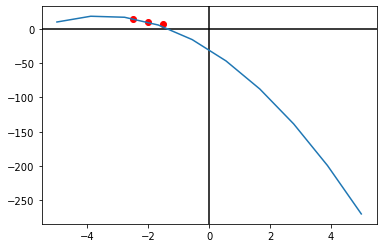

In [126]:
# 1. (−2.5,15.0),(−2,10),(−1.5,7.0) 

eq1 = 6.25*a2 -2.5*a1 + a0 - 15
eq2 = 4*a2 - 2*a1 + a0 - 10
eq3 = 1.25*a2 - 1.5*a1 + a0 - 7

print (nonlinsolve ([eq1, eq2, eq3], [a2, a1, a0])) 

x_range = np.linspace (-5, 5, num=10)
f = lambda x: -4*x**2 - 28*x - 30
plt.scatter ([-2.5, -2,-1.5], [15,10,7], c='r')
plt.axhline (0, color = 'black')
plt.axvline (0, color = 'black')
plt.plot (x_range, f(x_range))

{(4.0, -10.0, 10.0, -7.0)}


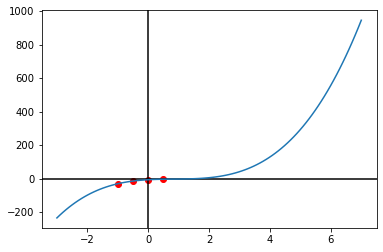

In [127]:
# 2. (−0.5,−15.0),(−1,−31),(0,−7),(0.5,−4.0)
a3,a2,a1,a0 = symbols ('a3,a2,a1,a0')

eq1 = -0.125*a3 + 0.25*a2 - 0.5*a1 + a0 + 15
eq2 = -a3 + a2 - a1 + a0 + 31
eq3 = a0 + 7
eq4 = 0.125*a3 + 0.25*a2 + 0.5*a1 + a0 + 4

print (nonlinsolve ([eq1, eq2, eq3, eq4], [a3, a2, a1, a0]))

x_range = np.linspace (-3, 7, num=100)
f = lambda x: 4*x**3 -10*x**2 + 10*x - 7
plt.scatter ([-0.5, -1, 0, 0.5], [-15,-31,-7,-4], c='r')
plt.axhline (0, color = 'black')
plt.axvline (0, color = 'black')
plt.plot (x_range, f(x_range))

# Approximation

## Mean squared error (MSE)

In [131]:
def print_points_and_function (sympy_function):
    def function (x_): return float (sympy_function.subs(x, x_))

    points_X = np.array ([-3, -2, -1, 1, 2, 3])
    points_Y = np.array ([15, 8, 13, 10, 15, 30])
    plt.xlim (-25, 7.5)
    plt.ylim (-1, 40)
    
    plt.scatter (points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0],plt.xlim()[1], num=100)
    
    function_Y = [function(x_) for x_ in x_range]
    plt.plot (x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum ([(points_Y[i] - function (points_X[i]))**2 for i in range (len (points_Y))]) / len (points_Y)
    print (f'MSE = {MSE}')

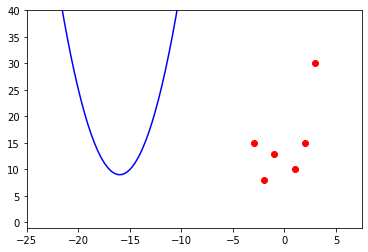

MSE = 68981.16666666667


In [132]:
f = x**2 + 32*x + 265
print_points_and_function (f)

## Square function transformation. Offset along OX

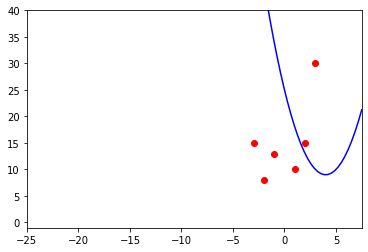

MSE = 687.8333333333334


In [138]:
# To move along OX you have to substract from x
f_new = f.subs(x, x - 20)
display (f_new)

# expand symplifies the function with the new argument
display (expand (f_new))
print_points_and_function(f_new)

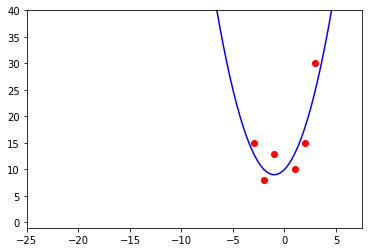

MSE = 11.166666666666666


In [139]:
# roll back on 5 point to the left
f_new2 = expand(f_new.subs(x, x + 5))
print_points_and_function(f_new2)

## Square function transformation. Compression along OY

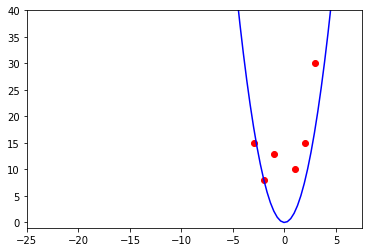

MSE = 64.5


In [146]:
# To compress/stretch the function you have to multiply it
f = x**2 / 3

# instead of .subs() you simply multiply the f
f_new = 6 * f
print_points_and_function(f_new)

# Multivariable functions

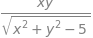

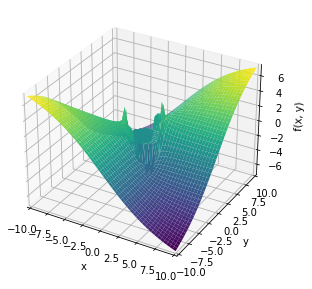

In [148]:
from sympy.plotting import plot3d 
x, y = symbols ('x, y')

f = x * y / sqrt(x**2 + y**2 - 5)
display (f)
plot3d (f)

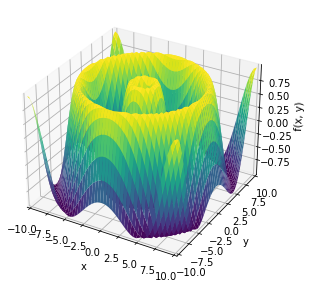

In [149]:
f = sin(sqrt(x ** 2 + y ** 2))
display (f)
plot3d (f)

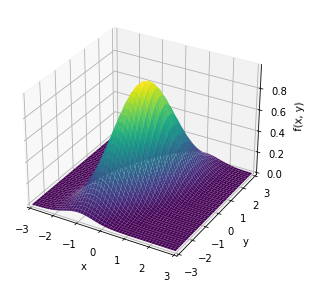

In [152]:
f = exp(-0.9*x**2 -0.45*(x-y)**2)
display (f)

#restrictions for the graph
plot3d(f, (x,-3,3), (y,-3,3))

## zeroes of multivariable functions

In [155]:
# A case of dependent variables
f1 = 5 * x - 3 * y + 2
display(f1)
solve(f1)

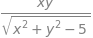

In [156]:
# A case of independent variables
f2 = x * y / sqrt(x**2 + y**2 - 5)
display(f2)
solve(f2)

## Exercises

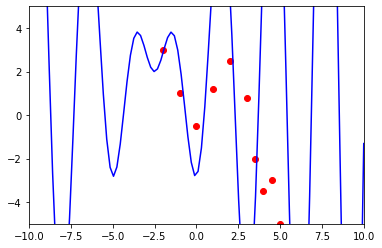

MSE = 90.56454338961888


In [167]:
# Minimize MSE down to 0.75 by elementary transformations of f1

f1 = 2 * x * sin(2 * x + 5) + 5 * sin(2 * x + 5) + 2

def print_points_and_function_1 (sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([3, 1, -0.5, 1.2, 2.5, 0.8, -2, -3.5, -3, -5])
    plt.xlim(-10, 10)
    plt.ylim(-5, 5)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

display (f1)
print_points_and_function_1 (f1)

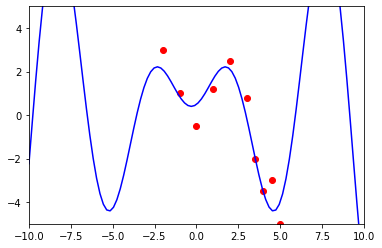

MSE = 0.5929850777381009


In [168]:
# right shift:
f1_1 = f1.subs({x: x - 2.35}).expand()

# stretch along ОX:
f1_2 = f1_1.subs({x: x / 2.0}).expand()

# down shift:
f1_3 = f1_2 - 1.6

display (f1_3)
print_points_and_function_1(f1_3)

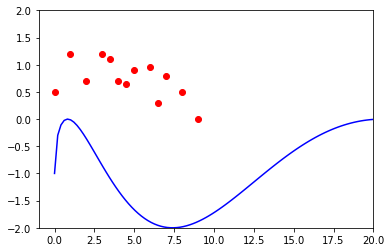

MSE = 4.609003555572037


In [169]:
# Minimize MSE down to 1 by elementary transformations of f2

f2 = sin(sqrt(3) *sqrt(x)) - 1

def print_points_and_function_2(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([0, 1, 2, 3, 3.5, 4, 4.5, 5, 6, 6.5, 7, 8, 9])
    points_Y = np.array([0.5, 1.2, 0.7, 1.2, 1.1, 0.7, 0.65, 0.9, 0.95, 0.3, 0.8, 0.5, 0.0])
    plt.xlim(-1, 20)
    plt.ylim(-2, 2)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0] + 1, plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

display (f2)
print_points_and_function_2(f2)

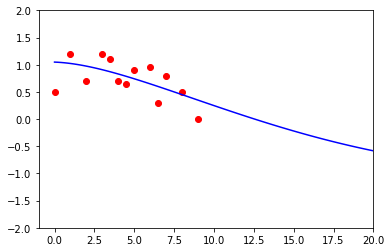

MSE = 0.07488084839467699


In [170]:
# left shift:
f2_1 = f2.subs({x: x + 0.885})

# stretch along OX:
f2_2 = f2_1.subs({x: x / 5})

# up shift:
f2_3 = f2_2 + 1.05

display (f2_3)
print_points_and_function_2(f2_3)

[{x: 0}, {y: 0}]


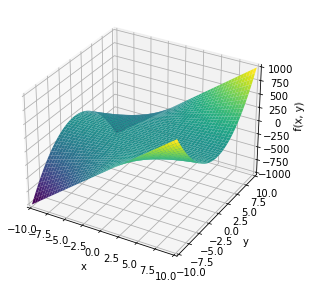

In [171]:
# Draw graphs and find zeroes. Draw graphs of the zeroes, unless they are constants

f = x*y**2
display (f)
print (solve (f))
plot3d (f)

[{x: 0}, {x: 1}, {y: 0}]


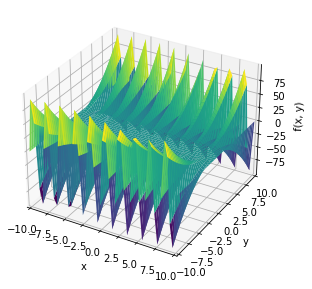

In [176]:
# Draw graphs and find zeroes. Draw graphs of the zeroes, unless they are constants
f=y**2*sin(pi*x)
display (f)
print (solve (f))
plot3d (f)

[{x: 0}, {x: pi}, {y: 2}, {y: 2 + pi}]


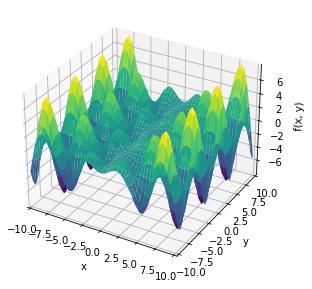

In [177]:
# Draw graphs and find zeroes. Draw graphs of the zeroes, unless they are constants

f = x*sin(x) * sin(y - 2)
display (f)
print (solve (f))
plot3d (f)

# Approximation of a multivariable function

In [178]:
# symbols for the unknown coefficients
a2, a1, a0 = symbols('a2, a1, a0')

In [179]:
# MSE based on the historical data

MSE = 1/3 * (((a2 * 2 + a1 * 200 + a0) - 200)**2 + \
             ((a2 * 1 + a1 * 450 + a0) - 300)**2 + \
             ((a2 * 3 + a1 * 550 + a0) - 600)**2)

In [249]:
# Randomly picked weights to make a start point for further approximation
# f1 = 100 * x2 - 1 * x1 - 100
# f2 = 200 * x2 + 3 * x1 + 20

print (MSE.subs({a2: 100, a1: -1, a0: -100}))
print (MSE.subs({a2: 200, a1: 3, a0: 20}))

518333.333333333
1691400.00000000


## Partial derivatives of a multivariable MSE

In [180]:
# The initial MSE
MSE = 1/3 * (((a2 * 2 + a1 * 200 + a0) - 200)**2 + \
             ((a2 * 1 + a1 * 450 + a0) - 300)**2 + \
             ((a2 * 3 + a1 * 550 + a0) - 600)**2)

# Partial derivatives for all variables

MSEa2 = 1/3 * (28 * a2 + 5000 * a1 + 12 * a0 - 5000)
MSEa1 = 1/3 * (5000 * a2 + 1090000 * a1 + 2400 * a0 - 1010000)
MSEa0 = 1/3 * (12 * a2 + 2400 * a1 + 6 * a0 - 2200)

# Solve the system of equations, observing the Necessary condition for the extremum of a multivariable function:
# All partial derivatives at this point must be zero
nonlinsolve([MSEa2, MSEa1, MSEa0], [a2, a1, a0])

In [181]:
# The weights and MSEmin are found
MSE.subs({a2: 108.333333333333, a1: 0.833333333333333, a0: -183.333333333334})

## Some derivatives

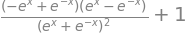

In [184]:
# hyperbolic tangent function
th = (exp(x) - exp(-x)) / (exp(x) + exp(-x))
display (th)

# derivative
diff(th)

# SymPy has built-in functions for that
# tanh(x)
# diff(tanh(x))

In [185]:
# diff can also be used to find partial derivatives. E.g: diff (MSE, a2)

# MSE and its manually calculated partial derivatives
MSE = 1/3 * (((a2 * 2 + a1 * 200 + a0) - 200)**2 + \
             ((a2 * 1 + a1 * 450 + a0) - 300)**2 + \
             ((a2 * 3 + a1 * 550 + a0) - 600)**2)

MSEa2 = 1/3 * (28 * a2 + 5000 * a1 + 12 * a0 - 5000)
MSEa1 = 1/3 * (5000 * a2 + 1090000 * a1 + 2400 * a0 - 1010000)
MSEa0 = 1/3 * (12 * a2 + 2400 * a1 + 6 * a0 - 2200)

# comparison of the two ways to calculates MSEa2
print (diff(MSE, a2))
print (MSEa2)

4.0*a0 + 1666.66666666667*a1 + 9.33333333333333*a2 - 1666.66666666667
4.0*a0 + 1666.66666666667*a1 + 9.33333333333333*a2 - 1666.66666666667


## Exercises

In [198]:
# Find partial derivatives of functions. Plot these derivatives and find their zeros
f1 = x*(y-5)**2
f2 = (y-exp(1)/20)**2*sin(pi*x)
f3 = x*sin(x) * sin(y-2)

def partial_diff (f):
    display (f)
    fx = diff(f, x)
    fy = diff(f, y)

    print ('partial derivate for x:', fx, '    zeroes of dx:', solve(fx))
    print ('partial derivate for y:', fy, '    zeroes of dy', solve(fy))

    plot(fx), plot3d(fy)

partial derivate for x: (y - 5)**2     zeroes of dx: [5]
partial derivate for y: x*(2*y - 10)     zeroes of dy [{x: 0}, {y: 5}]


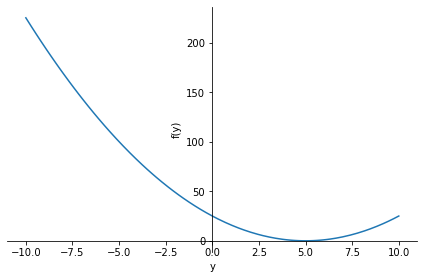

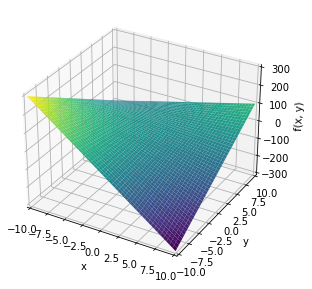

In [194]:
partial_diff (f1)

partial derivate for x: pi*(y - E/20)**2*cos(pi*x)     zeroes of dx: [{x: 1/2}, {x: 3/2}, {y: E/20}]
partial derivate for y: (2*y - E/10)*sin(pi*x)     zeroes of dy [{x: 0}, {x: 1}, {y: E/20}]


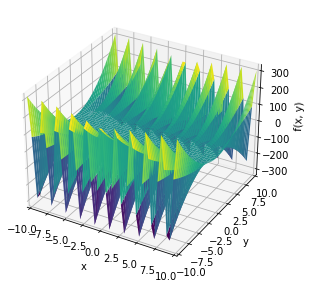

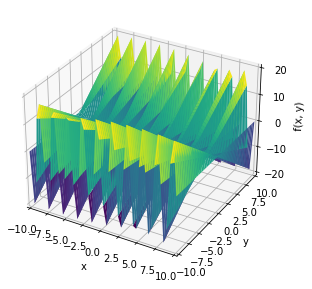

In [199]:
def partial_diff_2 (f):
    display (f)
    fx = diff(f, x)
    fy = diff(f, y)

    print ('partial derivate for x:', fx, '    zeroes of dx:', solve(fx))
    print ('partial derivate for y:', fy, '    zeroes of dy', solve(fy))

    plot3d(fx), plot3d(fy)

partial_diff_2 (f2)

partial derivate for x: x*sin(y - 2)*cos(x) + sin(x)*sin(y - 2)     zeroes of dx: [{y: 2}, {y: 2 + pi}]
partial derivate for y: x*sin(x)*cos(y - 2)     zeroes of dy [{x: 0}, {x: pi}, {y: 2 + 3*pi/2}, {y: pi/2 + 2}]


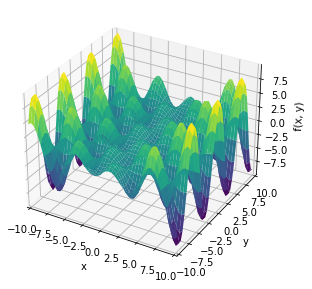

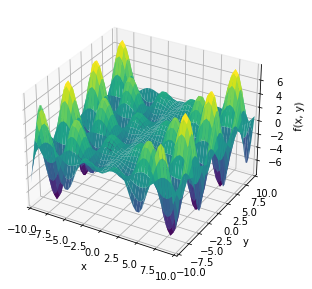

In [200]:
partial_diff_2 (f3)

In [201]:
# An approximation problem

MSE = 1/3 * (((a2 * 560 + a1 * 1945 + a0) - 4.3)**2 + \
             ((a2 * 340 + a1 * 1495 + a0) - 4.9)**2 + \
             ((a2 * 343 + a1 * 1570 + a0) - 5.2)**2)

MSEa2 = diff(MSE, a2)
MSEa1 = diff(MSE, a1)
MSEa0 = diff(MSE, a0)

nonlinsolve([MSEa2, MSEa1, MSEa0], [a2, a1, a0])

print (MSE.subs({'a2': -0.0118811881188096, 'a1': 0.00447524752475122, 'a0': 2.24910891089222}))
print (MSE.subs({'a2': -0.0118811881188096, 'a1': -0.00447524752475122, 'a0': 2.24910891089222}))

x2, x1 = symbols('x2, x1')
f = -0.0118811881188096 * x2 + 0.00447524752475122 * x1 + 2.24910891089222

print ('answer:', f.subs({'x2': 431, 'x1': 1520}))

1.78561736250405e-27
226.526891716372
answer: 3.93069306930714


# Gradient

In [203]:
a1, a2 = symbols('a1, a2')

# MSE on histprical data
MSE = 1 / 4 * ((1 * a1 + 2 * a2 - 5)**2 + \
               (5 * a1 + 3 * a2 - 6)**2 + \
               (2 * a1 + 4 * a2 - 10)**2 + \
               (3 * a1 + 7 * a2 - 8)**2)

# Random values and starting point 
MSE.subs({a1: 0.57, a2: 0.91})

In [204]:
#numpy.array allow vector operations
import numpy as np

# partial derivatives for MSE, also coordinates on a two-dimensional plot
MSEa1 = diff(MSE, a1)
MSEa2 = diff(MSE, a2)

# Gradient Descent Step
step = 0.01

# Create a vector from the MSE starting point (or updatable point for the next steps)
point = np.array([0.57, 0.91])
# point = next_point

# Make a gradient in point
grad = np.array([MSEa1.subs({a1: point[0], a2: point[1]}), 
                 MSEa2.subs({a1: point[0], a2: point[1]})])

# Gradient Descent Step
next_point = point - grad * step

# Check MSE in next_point
MSE.subs({a1: next_point[0], a2: next_point[1]})

# SLAE (system of linear algebraic equations)

In [205]:
# nonlinsolve can solve SLAE, but matrices cannot be passed to it
a1, a2 = symbols('a1, a2')

eq1 = 4.1 * a1 + 3.9 * a2 - 4
eq2 = 4.7 * a1 + 4.2 * a2 - 4.3

nonlinsolve([eq1, eq2], [a1, a2])

# Matrices and vectors

In [206]:
# linsolve allows you to pass a matrix and a vector as an argument
# X - matrix with features
# X_augmented - augmented matrix with answers

X = Matrix([[4.1, 3.9], [4.7, 4.2]])
X_augmented = Matrix([[4.1, 3.9, 4], [4.7, 4.2, 4.3]])

# When passing an argument like this to linsolve, the function itself first of all
# does matrix-vector scalar multiplication to get a system of equations.
linsolve(X_augmented, [a1, a2])

In [219]:
# Operations with matrices and vectors
X = Matrix([[4.1, 3.9], [4.7, 4.2]])
a = Matrix([a1, a2])
b = Matrix([4, 4.3])

X * a - b

[ 4.1*a1 + 3.9*a2 - 4 ]
[                     ]
[4.7*a1 + 4.2*a2 - 4.3]

In [216]:
x, y, z = symbols('x, y, z')

A = Matrix([[-1,7,-34], [8,8,-48]])
B = Matrix([[4,-7,-4], [3,-4,-3]])
C = Matrix([[5,7,-5,-47], [0,-2,2,10], [-4,-8,-7, 63]])

print (linsolve(A, [x, y]))
print (linsolve(B, [x, y]))
print (linsolve(C, [x, y, z]))

{(-1, -5)}
{(-1, 0)}
{(-2, -6, -1)}


In [243]:
# Inverse matrix and operations
M = Matrix([[1,3,-5],[0,1,2],[0,0,1]])
print ('\n given matrix')
display (M)

print ('\n its cofactor matrix')
display (M.cofactor_matrix())

print ('\n transposed cofactor matrix')
display (M.cofactor_matrix().T)

print ('\n determinant of the matrix')
display (M.det())

print ('\n its inverse matrix')
M_inverse = M.cofactor_matrix().T / M.det()
display (M_inverse)

print ('\n unit matrix (inverse matrix check)')
display (M*M_inverse)


 given matrix


[1  3  -5]
[        ]
[0  1  2 ]
[        ]
[0  0  1 ]


 its cofactor matrix


[1   0   0]
[         ]
[-3  1   0]
[         ]
[11  -2  1]


 transposed cofactor matrix


[1  -3  11]
[         ]
[0  1   -2]
[         ]
[0  0   1 ]


 determinant of the matrix



 its inverse matrix


[1  -3  11]
[         ]
[0  1   -2]
[         ]
[0  0   1 ]


 unit matrix (inverse matrix check)


[1  0  0]
[       ]
[0  1  0]
[       ]
[0  0  1]

# Overdetermined linear systems of equations

In [218]:
# An overdetermined system of linear equations is a system that has more equations than variables.
# In this case, the problem is also solved through approximation using MSE

a1, a2 = symbols('a1, a2')

MSE = 1 / 4 * ((4.1 * a1 + 3.9 * a2 - 4.0)**2 + \
               (4.7 * a1 + 4.2 * a2 - 4.3)**2 + \
               (3.1 * a1 + 2.9 * a2 - 3.0)**2 + \
               (4.9 * a1 + 5.0 * a2 - 4.9)**2)
print (MSE.subs({a1: 0, a2: 0}))

MSEa1 = diff(MSE, a1)
MSEa2 = diff(MSE, a2)

step = 0.01
point = np.array([0, 0])
grad = np.array([MSEa1.subs({a1: point[0], a2: point[1]}), 
                 MSEa2.subs({a1: point[0], a2: point[1]})])

next_point = point - step * grad

print (MSE.subs({a1: next_point[0], a2: next_point[1]}))

16.8750000000000
1.58934775845000


In [224]:
# Another gradient descent
x,y,z = symbols ('x, y, z')

MSE = 1 / 6 * ((5*x + 7*y - 5*z + 47)**2 + \
               (-2*x + 2*z - 10)**2 + \
               (-4*x - 8*y - 7*z - 63)**2 + \
               (x + y + 2*z + 1)**2 + \
               (2*x - y + 2*z + 4)**2 + \
               (4*x + y + 4*z + 2)**2)

print (f'point[0] {MSE.subs({x: 0, y: 0, z: 0})}')

MSEx = diff(MSE, x)
MSEy = diff(MSE, y)
MSEz = diff(MSE, z)

step = 0.01

# point = np.array([0, 0, 0])
point = next_point
grad = np.array([MSEx.subs({x: point[0], y: point[1], z: point[2]}), 
                 MSEy.subs({x: point[0], y: point[1], z: point[2]}),
                 MSEz.subs({x: point[0], y: point[1], z: point[2]})])
                 
next_point = point - step * grad

MSE.subs({x: next_point[0], y: next_point[1], z:next_point[2]})

point[0] 1049.83333333333


# Pseudo inverse matrix as MSEmin solution

In [253]:
# A * best_weights = c

# historical data
A = Matrix([[ 5.0,  7.0, -5.0],
            [ 0.0, -2.0,  2.0],
            [-4.0, -8.0, -7.0],
            [ 1.0,  1.0,  2.0],
            [ 2.0, -1.0,  2.0],
            [ 4.0,  1.0,  4.0]])

# answers
c = Matrix([-47.0, 10.0, 63.0, -1.0, -4.0, -2.0])

A_pseudo_inverse = (A.T * A)**(-1) * A.T

best_weights = A_pseudo_inverse * c
best_weights

[0.00609803768274186]
[                   ]
[ -7.00570713783129 ]
[                   ]
[-0.559143147525604 ]

In [258]:
x, y, z = symbols('x, y, z')

MSE = 1 / 6 * ((5 * x + 7 * y - 5 * z + 47)**2 + \
               (- 2 * y + 2 * z - 10)**2 + \
               (-4 * x - 8 * y - 7 * z - 63)**2 + \
               (x + y + 2 * z + 1)**2 + \
               (2 * x - y + 2 * z + 4)**2 + \
               (4 * x + y + 4 * z + 2)**2)

print ('zero weights MSE:', MSE.subs({x: 0, y: 0, z: 0}))
print ('MSEmin:' , MSE.subs({x: best_weights[0], y: best_weights[1], z: best_weights[2]}))

zero weights MSE: 1049.83333333333
MSEmin: 36.5242879107706
